# 2.2 Random Variables
- If $X$ represent some unknown quantity of interest and/or could change, we call it a random variable _(rv)_.
- The set of possible values, denoted $\mathcal{X}$, is known as the **sample space** or **state space**.
- **An event** is a set of outcomes from a given sample space. 

## 2.2.1 Discrete random variables

If the sample space $\mathcal{X}$ is finite or contably infinite, the $X$ is called a **discrete random variable**. In this case we denote the probability of the event that $X$ has value $x$ by $Pr(X=x)$. <br><br>
A **probability mass function** or **pmf** is a function which computes the probability of events which correspond to setting the _rv_ to each possible value: 
$$p(x)\triangleq Pr(X=x)$$
The **pmf** satisfies the properties $0 \leq p(x) \leq 1$ and $\sum_{x\in \mathcal{X}}p(x)=1$


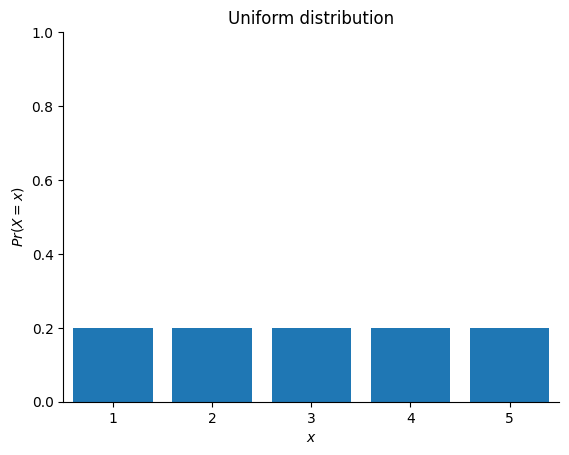

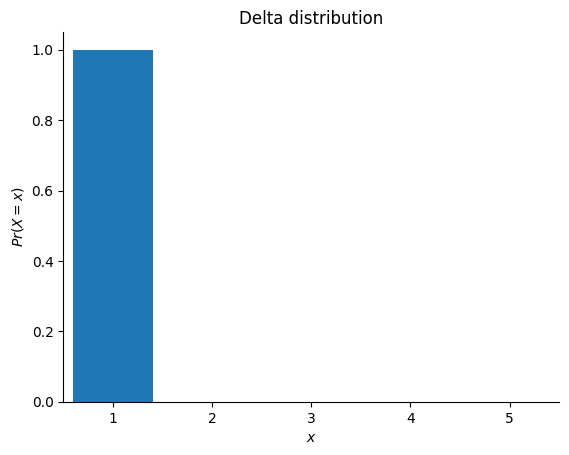

In [1]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
from jax.scipy.stats import norm


N = 5

def make_graph(probs, N, fig=None, title="", ax=None):
    x = jnp.arange(1, N + 1)
    if fig is None:
        fig, ax = plt.subplots()
    ax.bar(x, probs, align="center")
    ax.set_xlim([min(x) - 0.5, max(x) + 0.5])
    ax.set_xticks(x)
    ax.set_yticks(jnp.linspace(0, 1, N + 1))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$Pr(X=x)$")
    ax.set_title(title)  # Add the title here
    sns.despine()
    
    return fig, ax


uniform_probs = jnp.repeat(1.0 / N, N)
_, _ = make_graph(uniform_probs, N, title="Uniform distribution") 

delta_probs = jnp.array([1, 0, 0, 0, 0])
_, _ = make_graph(delta_probs, N, title="Delta distribution");

## 2.2.2 Continuous random variables
If $X \in \mathbb{R}$ is a real-valued quantity, it is called a continous random variable. In this case, we can no longer create a finite (or countable) set of distinct possible values if can take on. However, there are a contable number of intervarls which we can partition the real line into. <br>

### 2.2.2.1 Cumulative distribution function
Define the events $A =(X \leq a)$, $B=(X \leq b)$ and $C=(a < X\leq b)$. We have that $B=A\vee C$, and since $A$ and $C$ are mutually exclusive, **the sum rules gives** :
$$Pr(B)=Pr(A)+Pr(C)$$
and hence the probability of being in interval $C$ is given by
$$P(C)=Pr(B)-Pr(A)$$
In general we define the **cumulative distribution function** or **cdf** of the _rv_ as follow:
$$Pr(x) \triangleq Pr(X \leq x)$$
We use the capital $P$ to represent the **cdf**.<br>
We can compute the probability of being in any interval as follow:
$$Pr(a <X \leq b) = P(b) - P(a)$$
-CDF's are monotonically non-decreasing functions.


Text(0.5, 1.0, 'Cumulative distribution')

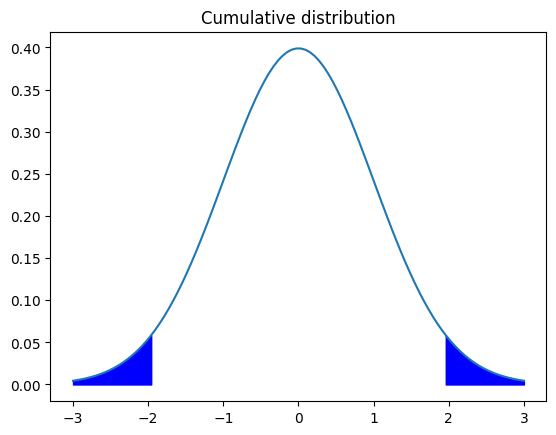

In [45]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
from jax.scipy.stats import norm
x = jnp.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x)) #Probability distribution function
x_sep_left = norm.ppf(0.025) #Quantiles
x_sep_right = norm.ppf(0.975) #Quantiles
x_fill_left = jnp.linspace(-3, x_sep_left, 100)
x_fill_right = jnp.linspace(x_sep_right, 3, 100)
plt.fill_between(x_fill_left, norm.pdf(x_fill_left), color="b")
plt.fill_between(x_fill_right, norm.pdf(x_fill_right), color="b")
plt.title("Cumulative distribution")

### 2.2.2.2 Probability density function (pdf)
We define the probability density function or pdf as the derivativa of the cdf:
$$p(x) \triangleq \frac{d}{d_x}P(x)$$
The derivativa is not always exist, in which case the pdf is not defined. <br>
Given a pdf, we can compute the probability of a continuous variable being in a finite interval as follows:
$$Pr(a<x\leq b)= \int_{a}^{b}p(x)dx=P(a)P(b)$$
As the size of the interval get smaller, we can write 
$$Pr(x\leq X \leq x+dx) \approx p(x)dx$$
Intuitively, this says the probability of $X$ being in a small interval around $x$ is the density at $x$ times the width of the interval. 


### 2.2.2.3 Quantiles
If the cdf P is strictly monotonically increasing, it has an inverse, called the inverse cdf, or percent point function (ppf), or quantile function.<br>
If P is the cdf o $X$, then $P^{-1}(q)$ is the value $x_{q}$ such that $Pr(X \leq x_{q})=q$; this is alled the $q'th$ quaintile of $P$.  The value $P^{-1}(0.5)$ is the **median** of the distribution, with half of the probability mass on the left, and half on the right. The values $P^{-1}(0.25)$ and $P^{-1}(0.75)$ are lower and upper **quartiles**. 
<br>

For example, let $\phi$ be the cdf of the Gaussan Distribution $\mathcal{N}(0.1)$ and $\Phi^{-1}$ be the inverse cdf. The points to the left of $(\Phi^{-1}(\alpha/2)$ also contain $\alpha/2$ of the mass. Hence the central interval $(\Phi^{-1}(1-\alpha/2))$ contains $1-\alpha$ of the mass. If we set $\alpha=0.05$, the central $95%$ interval is convered by the range 
<br>$$(\Phi^{-1}(0.025),\Phi^{-1}(0.075))=(-1.96,1.96)$$ <br>
If the distribution is $\mathcal{N}(\mu,\sigma^2)$ then the interval $95%$ interval becomes $(\mu-1.96\sigma $,$ \mu+1.96\sigma)$. This is often approximated by writing $\mu \pm 2\sigma$.

## 2.2.3 Sets of related random variables

Suppose, to start, that we have two random variables, X and Y. We can define the **joint distribution** of two random variables using $p(x,y) = p(X=x $,$Y=y)$ for all possible values of X and Y. If both variables have finite cardinality, we can represent the joiint distribution as a 2d table, all ofwhose entries sum to one. 
<br>
If both variables have finite cardinality, we can factorize the 2d join table into a product of two 1d vectors. <br>
Given a joint distribution, we define the **marginal distrribution** of an random variable as follows: 
$$p(X=x)=\sum_{y}p(X=x,Y=y)$$ 
Where we are summing over all possible states of $Y$. This is sometimes called the **sum rule** or the **rule of total probability**.
<br>
The term "marginal" comes from the accounting practice of writing the sums of rows and columns on the side, or margin, of a table. <br>
We define the **conditional distribution** of an random variable using
$$p(Y=y|X=x)=\frac{p(X=x,Y=y)}{p(X=x)}$$
We can rearrange this equation to get $$p(x,y)=p(x)p(y|x)$$
This is called the **product rule**.<br>
By extending the product rule to $D$ variables, we get the **chain rule of probability**
$$p(x_{1:D})=p(x_{1})p(x_{2}|x_{1})p(x_{3}|x_{1},x_{2})p(x_{4}|x_{1},x_{2},x_{3})...p(X_{D}|x_{1:D-1})$$

## 2.2.4 Independence and conditional independence

We say X and Y are **unconditionally independent** or **marginally independent**, denoted $X \perp Y$ , if we can represent the joint as the product of the two marginals , i.e.,
$$X \perp Y \iff p(X,Y) = p(X)p(Y)$$
In general, we say a set of variables $X_{1},.....,X_{n}$ is independent if the joint can be written as a product of marginals, i.e.,
$$p(X_{1},.....,X_{n} = \prod_{i=1}^{n}p(X_{i}) $$
Unfortunately, unconditional independence is rare, because most variables can influence most other variables. However, usually this influence is mediated via other variables rather than being direct. We therefore say X and Y are **conditionally independent (CI)** given Z iff the conditional joint can be written as a product of conditional marginals:
$$X \perp Y | Z \iff p(X, Y|Z) = p(X|Z)p(Y|Z) $$
We can write this assumption as a graph X - Z -  Y , which captures the intuition that all the dependencies between X and Y are mediated via Z. By using larger graphs, we can define complex joint distributions; these are known as **graphical models**, and are discussed in Section 3.6

## 2.2.5 Moments of a distribution

We describe various summary statistics that can be derived from a probability distribution (either a pdf or pmf).

### 2.2.5.1 Mean of a distribution

The most familiar property of a distribution is its *mean*, or *expected value*, often denoted by $\mu$. For continuous rv’s, the mean is defined as follows:

*Own words: each random variable has its cumulative density function, after that we differentiate that function and we obtain the pdf*
$$E[X] \triangleq \int_{\mathcal{X}}xp(x)dx$$
If the integral is not finite, the mean is not defined;

For discrete rv’s, the mean is defined as follows:
$$E[X] \triangleq \sum_{x \in \mathcal{X}} xp(x)$$

However, this is only meaningful if the values of x are ordered in some way. <br>

Since the mean is a linear operator, we have

$$E[aX+b]=aE[X]+b$$

This is called **linearity of expectation**. <br>

For a set of _n_ random variables, one can show that the expectation of their sum is as follows:
$$ E[ \sum_{i=1}^{n} X_{i} ]=\sum_{i=1}^{n}E[X_{i}]$$
If they are independent, the expectation of their product is given by
$$ E[ \prod_{i=1}^{n} X_{i} ]=\prod_{i=1}^{n}E[X_{i}]$$


In [9]:
import scipy.integrate as integrate

def pdf_normal(x, mu=0, sigma=1):
    """Returns the probability density of a normal distribution at point x."""
    from math import exp, pi, sqrt
    return (1 / (sigma * sqrt(2 * pi))) * exp(-0.5 * ((x - mu) / sigma) ** 2)


pdf_normal(1)

0.24197072451914337

In [10]:
def pdf_normal(x, mu=0, sigma=1):
    """Probability density function of a normal distribution."""
    from math import exp, pi, sqrt
    return (1 / (sigma * sqrt(2 * pi))) * exp(-0.5 * ((x - mu) / sigma) ** 2)

def mean_continuous(pdf, a, b, num_points=10000):
    """Approximate the mean of a continuous distribution using numerical integration."""
    dx = (b - a) / num_points
    total = 0
    
    for i in range(num_points):
        x = a + i * dx
        total += x * pdf(x) * dx  # Trapezoidal method approximation
    
    return total

# Approximate the mean of a standard normal distribution (-inf to inf)
mean_value = mean_continuous(pdf_normal, -10, 10)  # Truncate integration at ±10
print("Approximated Mean:", mean_value)


Approximated Mean: 3.049822997085782e-17


<module 'matplotlib.pyplot' from 'C:\\Users\\bryan\\Documents\\Pythonwork\\UAI_CIT\\uai_cit\\Lib\\site-packages\\matplotlib\\pyplot.py'>

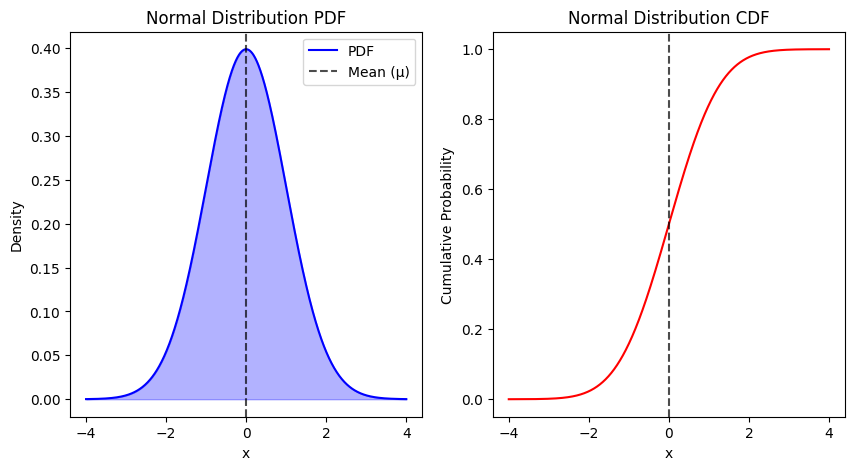

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi, sqrt
from scipy.special import erf

# Define the Normal PDF
def pdf_normal(x, mu=0, sigma=1):
    """Probability density function (PDF) of a normal distribution."""
    return (1 / (sigma * sqrt(2 * pi))) * exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the Normal CDF
def cdf_normal(x, mu=0, sigma=1):
    """Cumulative distribution function (CDF) of a normal distribution."""
    return 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))

# Generate X values
x_values = np.linspace(-4, 4, 1000)  # Range from -4σ to +4σ
pdf_values = [pdf_normal(x) for x in x_values]
cdf_values = [cdf_normal(x) for x in x_values]

# Plot the PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values, pdf_values, label="PDF", color="blue")
plt.fill_between(x_values, pdf_values, alpha=0.3, color="blue")
plt.axvline(0, color="black", linestyle="--", alpha=0.7, label="Mean (μ)")
plt.title("Normal Distribution PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf_values, label="CDF", color="red")
plt.axvline(0, color="black", linestyle="--", alpha=0.7, label="Mean (μ)")
plt.title("Normal Distribution CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt


### 2.2.5.2 Variance of a distribution

The variance is a measure of the “spread” of a distribution, often denoted by $\sigma^2$. This is defined as follows:

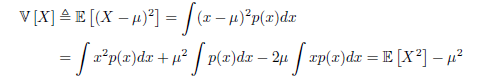

from which we derive the useful result
$$E[X^2]=\sigma^2+\mu^2$$

The **standard deviation** is defined as

$$std[X] \triangleq \sqrt{V[X]}=\sigma$$

This is useful since it has the same units as X itself. <br> 
The variance of a shifted and scaled version of a random variable is given by
$$ V[aX+b]=a^2V[X]$$

If we have a set of _n_ independent random variables, the variance of their sum is given by the sum of their variances:

$$V[\sum_{i=1}^{n}X_{i}]=\sum_{i=1}^{n}V[X_{i}]$$

The variance of their product can also be derived, as follows:

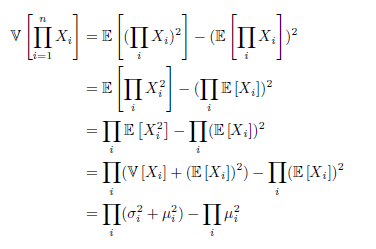


### 2.2.5.3 Mode of a distribution

The **mode** of a distribution is the value with the highest probability mass or probability density

$$x^*=argmax_{x}p(x)$$

### 2.2.5.4 Conditional moments

When we have two or more dependent random variables, we can compute the moments of one given knowledge of the other. For example, **the law of iterated expectations**, also called the **law of total expectation**, tells us that

$$E[X]=E_{Y}[E[X|Y]]$$

To prove this, let us suppose, for simplicity, that X and Y are both discrete rv's. Then we have

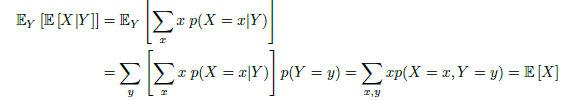

To give a more intuitive explanation, consider the following simple example. Let X be the lifetime duration of a lightbulb, and let Y be the factory the lightbulb was produced in. Suppose $E[X|Y = 1] = 5000$ and $E[X|Y = 2] = 4000$, indicating that factory 1 produces longer lasting bulbs.
Suppose factory 1 supplies 60% of the lightbulbs, so $p(Y = 1) = 0.6$ and $p(Y = 2) = 0.4$. Then the expected duration of a random lightbulb is given by

$$E[X] = E[X|Y = 1] p(Y = 1) + E[X|Y = 2] p(Y = 2)=5000*0.6 + 4000 * 0.4 = 4600 $$

There is a similar formula for the variance. In particular, the law of total variance, also called **the conditional variance formula**, tells us that

$$V[X] = E_{Y} [V[X|Y]] + V_{Y} [E[X|Y]]$$

## 2.2.6 Limitations of summary statistics

Using simple statistics such as the mean and variance, this can lose a lot of information. A striking example of this is known as **Anscombe’s quartet**: He shows 4 different datasets of (x,y) pairs, all of which have identical mean, variance and correlation coefficient _p_. However, the joint distributions from which these points were sampled are clearly very different $p(x, y)$. Anscombe invented these datasets, each consisting of 10 data points, to counter the impression among
statisticians that numerical summaries are superior to data visualization:

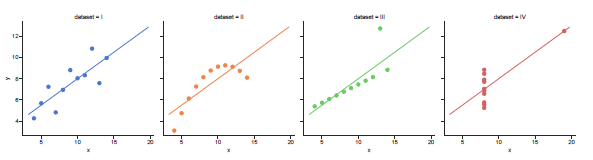

An even more striking example of this phenomenon is shown in a dataset that looks like a dinosaur, plus 11 other datasets, all of which have identical low order  statistics. This collection of datasets is called the **Datasaurus Dozen**

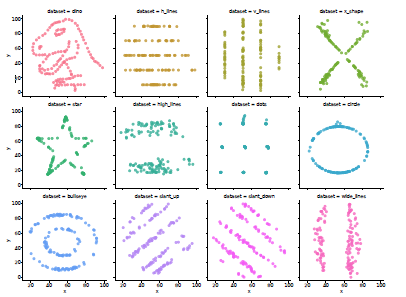